In [23]:
import os
# os.environ['CUDA_VISIBLE_DEVICES']='0'
import time
from helper.model import *
from helper.data import *
import cv2


In [24]:
import os

# 檢查當前工作目錄
print("Current working directory:", os.getcwd())
print("Files in testset:", os.listdir('./'))

dataset = 'dataset_Mitochondrion/'

# 列出 testset 資料夾中的文件
print("Files in testset:", os.listdir(dataset))

print("Files in testset:", os.listdir(dataset+'train_image'))
n_timage = len(os.listdir(dataset+'train_image'))
print(n_timage)
n_vimage = len(os.listdir(dataset+'val_image'))
print(n_vimage)

Current working directory: C:\Users\m9230\OneDrive - 財團法人國家實驗研究院\文件\GitHub_3\2024_NYCU_MI_course\240514
Files in testset: ['.ipynb_checkpoints', 'Cifar10_CNN.ipynb', 'dataset_Membrane', 'dataset_Mitochondrion', 'helper', 'image_2024_05_13T09_19_54_640Z.png', 'U-net.ipynb', 'UNet_Membrane.hdf5', '__pycache__']
Files in testset: ['train_image', 'train_label', 'val_image', 'val_label']
Files in testset: ['0000.png', '0016.png', '0032.png', '0048.png', '0064.png', '0080.png', '0096.png', '0112.png', '0128.png', '0144.png', '0160.png', '0176.png', '0192.png', '0208.png', '0224.png', '0240.png', '0256.png', '0272.png', '0288.png', '0304.png', '0320.png', '0336.png', '0352.png', '0368.png', '0384.png', '0400.png', '0416.png', '0432.png', '0448.png', '0464.png']
30
30


![image.png](https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg)

![image.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S1359646219300338-gr1.jpg)

###　Ref : https://www.sciencedirect.com/science/article/abs/pii/S1359646219300338

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import math
tic = time.time()

BatchSize = 5    # batch_size 為 1 的訓練方法有時被稱為 隨機梯度下降
steps_per_epoch = 6     #try to add a code but not specify a number
validation_steps = 7     #try to add a code but not specify a number

data_gen_args = dict(rotation_range=0.2,            #### !!! rotational dependent? !!!
                    width_shift_range=0.05,  
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_set = trainGenerator(BatchSize, dataset,'train_image','train_label',data_gen_args,save_to_dir = None)

# val_set = testGenerator('dataset/val_image',30 , target_size = (512,512))

#### !!! data_gen_args !!!

val_set = trainGenerator(BatchSize, dataset,'val_image','val_label', data_gen_args,save_to_dir = None)

# model = unet()
model = simple_unet_model()

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# model_checkpoint = tf.keras.callbacks.ModelCheckpoint('UNet_Membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)  #alternative way
model_checkpoint = ModelCheckpoint('UNet_Membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)

history = model.fit(train_set,steps_per_epoch=steps_per_epoch,epochs=5,callbacks=[model_checkpoint], validation_data=val_set, validation_steps = validation_steps)

toc = time.time()
print("Time=" + str((toc-tic)) + "sec")

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5
6/6 [==============================] - ETA: 0s - loss: 0.9999 - accuracy: 0.1560Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.

Epoch 1: loss improved from inf to 0.99991, saving model to UNet_Membrane.hdf5
6/6 [==============================] - 30s 5s/step - loss: 0.9999 - accuracy: 0.1560 - val_loss: 0.7744 - val_accuracy: 0.0635
Epoch 2/5
6/6 [==============================] - ETA: 0s - loss: 0.8173 - accuracy: 0.2188
Epoch 2: loss improved from 0.99991 to 0.81728, saving model to UNet_Membrane.hdf5
6/6 [==============================] - 26s 4s/step - loss: 0.8173 - accuracy: 0.2188 - val_loss: 0.7053 - val_accuracy: 0.1504
Epoch 3/5
6/6 [==============================] - ETA: 0s - loss: 0.7556 - accuracy: 0.2419
Epoch 3: loss improved from 0.81728 to 0.75563, saving model to UNet_Membrane.hdf5
6/6 [==============================] - 26s 5s/step - loss: 0.7556 - 

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 512, 512, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_5 (Dropout)            (None, 512, 512, 16  0           ['conv2d_12[0][0]']              
                                )                                                           

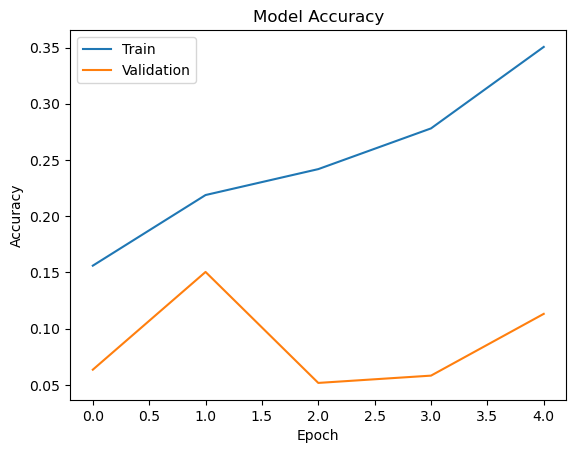

Text(0.5, 0, 'Epoch')

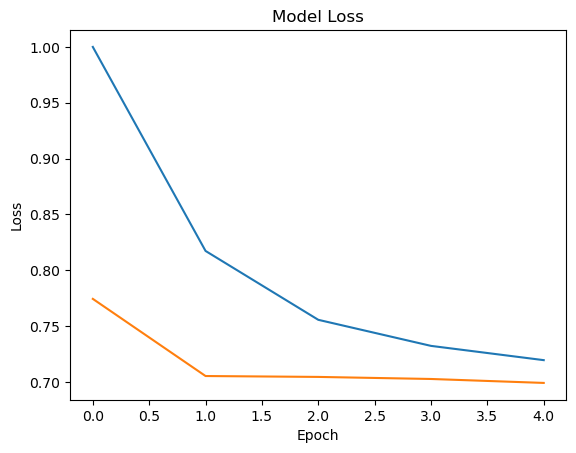

In [30]:
# 繪製訓練 & 驗證的準確率值
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

512
1/1 [==============================] - 0s 111ms/step
[[122.46895  127.68401  127.68401  ... 127.14264  125.74673  127.25262 ]
 [117.03532  125.012596 127.35799  ... 127.68401  127.68401  127.27951 ]
 [117.300514 125.73879  124.891655 ... 121.97318  127.68401  127.68401 ]
 ...
 [113.25736  117.97413  125.765274 ... 127.68401  127.68401  127.68401 ]
 [115.18373  121.87131  126.85597  ... 127.57788  127.68401  124.57863 ]
 [123.92289  126.14327  126.4457   ... 122.753784 125.514336 125.58832 ]]


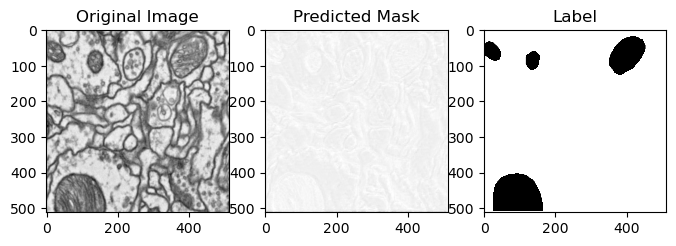

512
1/1 [==============================] - 0s 118ms/step
[[124.17626  126.864365 127.68401  ... 126.88324  126.36903  127.63329 ]
 [119.257225 119.11291  127.68401  ... 127.04939  127.68401  127.68401 ]
 [117.284325 121.38285  126.88913  ... 122.33619  127.68401  127.68401 ]
 ...
 [108.251    117.69195  127.25336  ... 127.68401  127.68401  127.68401 ]
 [107.641815 116.94372  127.68401  ... 127.1084   127.68401  126.26538 ]
 [122.03713  123.26828  127.25757  ... 118.593704 127.68401  126.238205]]


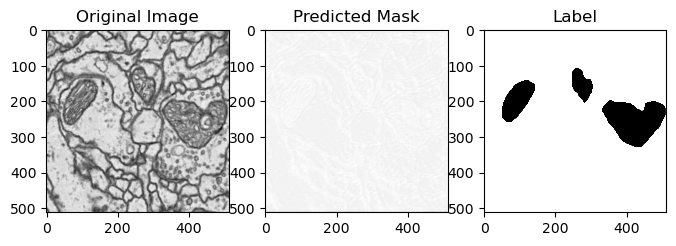

512
1/1 [==============================] - 0s 121ms/step
[[122.91168  127.68401  127.68401  ... 125.574776 125.6081   127.35397 ]
 [118.35036  125.71779  127.66514  ... 125.67641  127.39267  127.5557  ]
 [119.237206 125.78495  125.427635 ... 122.47847  127.55792  127.68401 ]
 ...
 [106.17207  115.7728   127.55331  ... 126.7678   127.68401  127.3916  ]
 [107.19319  116.83143  126.70166  ... 125.83444  127.68401  127.443085]
 [122.93935  125.756615 127.044525 ... 118.70162  127.68401  127.308   ]]


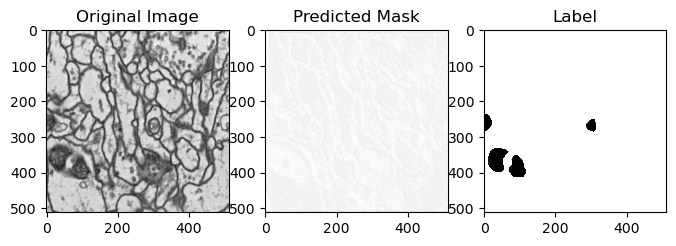

512
1/1 [==============================] - 0s 120ms/step
[[122.88803  127.62742  127.68401  ... 126.56218  125.91726  127.58185 ]
 [117.37235  124.507545 127.60793  ... 126.85341  127.68401  127.67854 ]
 [117.59118  125.39956  125.1708   ... 116.72023  127.68401  127.68401 ]
 ...
 [102.56931  114.64369  127.45474  ... 127.65429  127.68401  127.68401 ]
 [102.604935 117.054245 127.68401  ... 126.81326  127.68401  125.22182 ]
 [121.052155 124.9411   126.590385 ... 118.24969  127.68401  124.99697 ]]


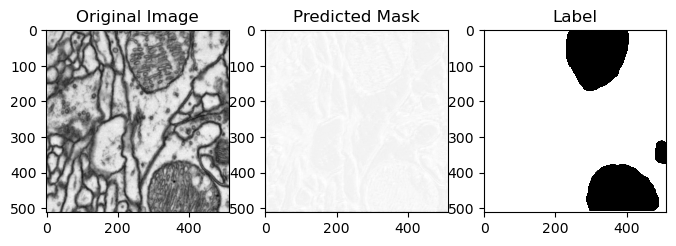

512
1/1 [==============================] - 0s 115ms/step
[[127.45019  127.68401  127.68401  ... 124.811104 125.43038  127.129395]
 [123.9767   127.35012  127.68401  ... 123.50751  127.00641  127.46419 ]
 [122.31962  126.387886 125.70051  ... 116.99523  127.68401  127.68401 ]
 ...
 [111.733284 121.234566 127.59234  ... 127.68401  127.68401  125.938354]
 [112.04835  121.88853  126.83304  ... 125.99083  127.68401  124.8239  ]
 [122.73498  126.30242  126.89711  ... 119.290535 127.68401  126.52108 ]]


512
1/1 [==============================] - 0s 116ms/step
[[123.109955 127.68401  127.68401  ... 126.30738  125.94331  127.43525 ]
 [118.83449  125.95085  127.58972  ... 125.282745 127.45666  127.13846 ]
 [118.70624  125.74112  125.42727  ... 119.03095  127.68401  127.68401 ]
 ...
 [112.189896 120.33935  127.68401  ... 127.558304 127.68401  127.68401 ]
 [112.55435  121.76161  127.68401  ... 126.85812  127.68401  127.68401 ]
 [123.43509  125.22375  126.97958  ... 120.49806  127.68401  126.27213 ]]


512
1/1 [==============================] - 0s 116ms/step
[[124.9934   127.413795 127.68401  ... 126.351395 125.73039  127.413635]
 [120.33506  121.98003  127.68401  ... 126.279236 127.68401  127.68401 ]
 [119.65362  122.64953  126.50984  ... 121.01362  127.68401  127.68401 ]
 ...
 [113.52986  118.96299  127.60659  ... 127.68401  127.68401  127.68401 ]
 [113.87049  122.678986 126.780914 ... 127.66604  127.68401  125.93664 ]
 [124.56046  126.35756  126.88945  ... 118.78614  127.68401  124.557014]]


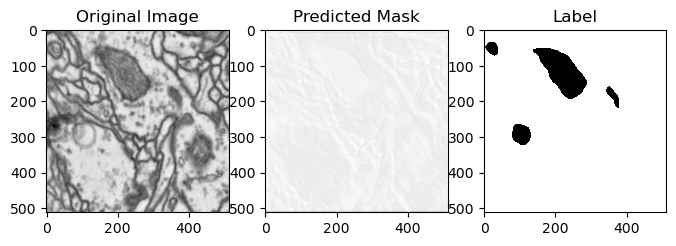

512
1/1 [==============================] - 0s 115ms/step
[[124.12798  127.68401  127.68401  ... 126.657585 125.76966  127.46161 ]
 [119.30715  125.10169  127.24453  ... 127.17611  127.68401  127.55938 ]
 [117.70187  125.07025  125.27047  ... 119.677414 127.68401  127.68401 ]
 ...
 [106.078476 116.32665  127.68401  ... 125.51523  127.68401  126.66309 ]
 [106.93951  119.23021  127.68401  ... 123.11103  127.68401  126.86781 ]
 [122.5948   125.23908  126.822075 ... 117.86078  127.68401  127.50181 ]]


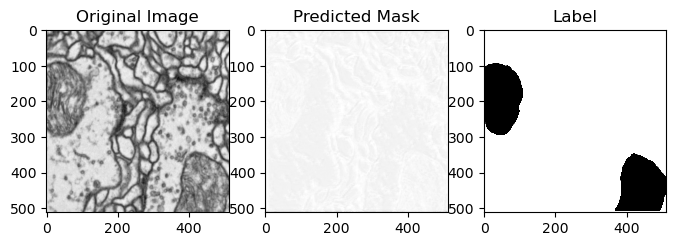

512
1/1 [==============================] - 0s 122ms/step
[[126.80573  127.68401  127.68401  ... 126.71695  126.30799  127.66529 ]
 [123.13993  126.94841  127.68401  ... 126.01745  127.68401  127.59354 ]
 [122.50574  126.60552  125.85751  ... 120.814644 127.68401  127.68401 ]
 ...
 [109.09181  118.86423  127.65173  ... 127.68401  127.68401  127.68401 ]
 [109.672134 119.28019  127.68401  ... 127.63038  127.68401  125.46535 ]
 [121.95703  124.162285 127.064125 ... 119.379684 127.68401  125.27519 ]]


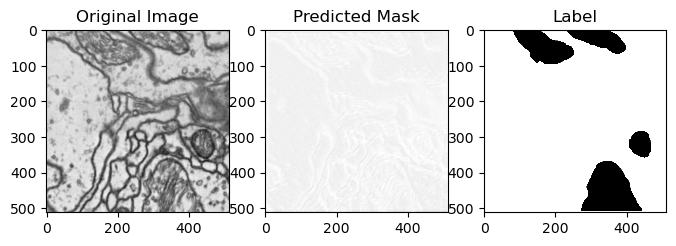

512
1/1 [==============================] - 0s 116ms/step
[[126.20394  127.68401  127.68401  ... 126.59566  126.15796  127.38339 ]
 [122.792404 126.5505   127.68401  ... 126.41222  127.6642   127.0832  ]
 [124.17729  126.773094 126.66643  ... 120.16235  127.68401  127.559746]
 ...
 [108.19329  120.04833  127.68401  ... 127.64579  127.68401  127.68401 ]
 [110.255745 119.68428  127.68401  ... 126.38063  127.68401  126.093796]
 [119.600204 121.069756 127.09883  ... 119.32249  127.68401  126.158035]]


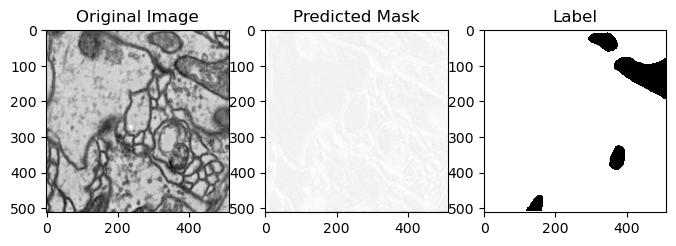

512
1/1 [==============================] - 0s 132ms/step
[[123.56557  127.55947  127.68401  ... 125.88008  124.7922   127.48789 ]
 [117.84655  124.35167  127.68401  ... 126.16024  127.68401  127.68401 ]
 [117.54334  125.387634 125.35196  ... 114.59249  127.68401  127.68401 ]
 ...
 [105.33759  116.65828  127.60349  ... 127.4923   127.68401  127.68401 ]
 [105.79016  118.29911  127.61941  ... 127.060936 127.68401  125.93965 ]
 [121.8747   125.44507  126.90907  ... 118.26482  127.68401  125.87649 ]]


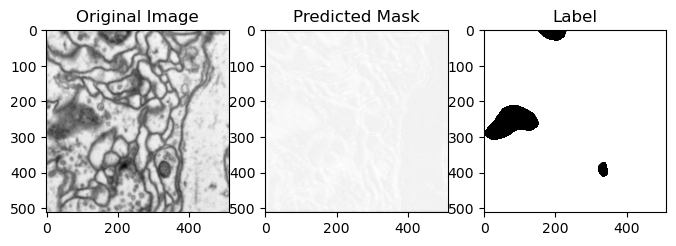

512
1/1 [==============================] - 0s 114ms/step
[[123.3841   127.6426   127.68401  ... 126.172646 125.22207  127.36738 ]
 [118.453285 123.97644  127.14264  ... 126.59152  127.68401  127.68401 ]
 [118.15801  126.11568  125.45652  ... 117.139465 127.68401  127.68401 ]
 ...
 [109.429886 118.93297  127.57906  ... 127.68401  127.68401  127.68401 ]
 [109.11661  121.04291  127.16086  ... 127.643906 127.68401  125.53674 ]
 [122.66294  126.17607  127.01782  ... 120.76685  127.510414 125.30034 ]]


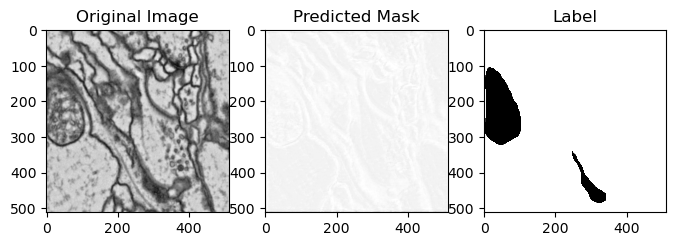

512
1/1 [==============================] - 0s 109ms/step
[[126.32812  127.68401  127.68401  ... 126.28498  124.95089  127.14586 ]
 [122.36575  124.90364  127.59618  ... 126.77458  127.68401  127.610725]
 [121.626205 126.052574 126.27451  ... 116.401146 127.68401  127.68401 ]
 ...
 [104.7973   114.66647  127.56498  ... 127.57882  127.68401  127.68401 ]
 [104.19871  118.48048  127.68401  ... 127.27087  127.68401  125.558624]
 [121.05091  125.35968  126.70263  ... 120.49752  127.68401  125.778564]]


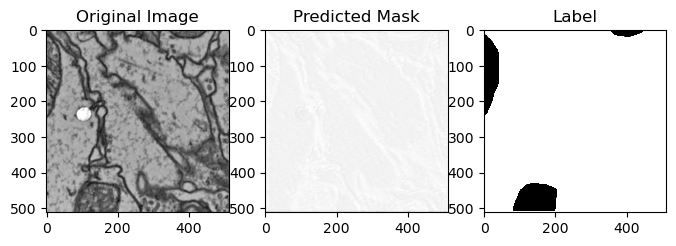

512
1/1 [==============================] - 0s 128ms/step
[[123.08336  127.54397  127.68401  ... 126.30242  125.85282  127.54268 ]
 [117.28351  123.0337   127.58626  ... 125.52997  127.68401  127.68066 ]
 [117.665764 125.39214  125.323975 ... 119.75096  127.68401  127.68401 ]
 ...
 [105.62008  118.32952  127.49293  ... 127.68401  127.68401  127.68401 ]
 [106.552956 119.485725 126.24274  ... 125.77978  127.68401  126.12356 ]
 [122.46123  126.13895  127.00635  ... 117.766945 127.68401  126.6668  ]]


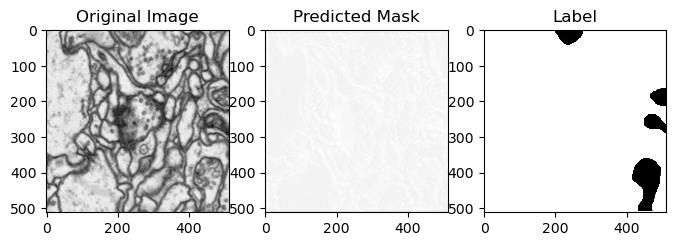

512
1/1 [==============================] - 0s 132ms/step
[[123.36433  127.65     127.68401  ... 126.52549  125.66989  127.43183 ]
 [117.81518  123.78563  127.43598  ... 126.09334  127.68401  127.5402  ]
 [117.42013  125.32019  125.30598  ... 117.33839  127.68401  127.68401 ]
 ...
 [105.85315  116.157715 127.343956 ... 127.68401  127.68401  127.68401 ]
 [106.03384  117.56783  127.68401  ... 127.68401  127.68401  127.68401 ]
 [121.577736 124.88335  127.02983  ... 121.36309  127.68401  126.093056]]


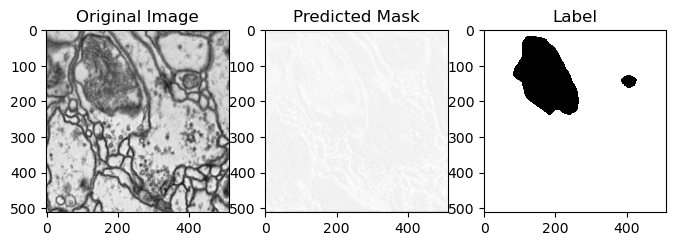

512
1/1 [==============================] - 0s 115ms/step
[[124.13686  127.551796 127.68401  ... 126.38316  124.672295 127.26752 ]
 [118.97576  125.54034  127.64587  ... 126.7343   127.68401  127.621185]
 [116.458855 124.88429  125.290306 ... 115.78168  127.68401  127.68401 ]
 ...
 [109.85363  114.14992  124.29333  ... 125.86666  127.68401  127.3107  ]
 [109.385185 115.80068  126.4468   ... 125.260284 127.68401  125.31304 ]
 [122.798706 124.47318  126.982506 ... 116.07754  127.68401  125.92067 ]]


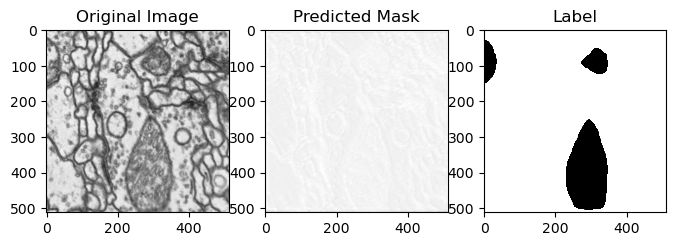

512
1/1 [==============================] - 0s 132ms/step
[[122.46862  127.39947  127.68401  ... 125.57659  125.89333  127.46942 ]
 [116.33933  121.950806 127.5882   ... 125.4871   127.4362   127.68401 ]
 [116.52619  124.81521  125.45647  ... 124.37975  127.58856  127.68401 ]
 ...
 [101.655334 112.90072  127.412834 ... 127.68401  127.68401  127.68401 ]
 [101.80491  115.27973  127.68401  ... 126.96195  127.68401  127.487656]
 [121.88599  124.514496 126.727585 ... 119.19988  127.68401  126.06564 ]]


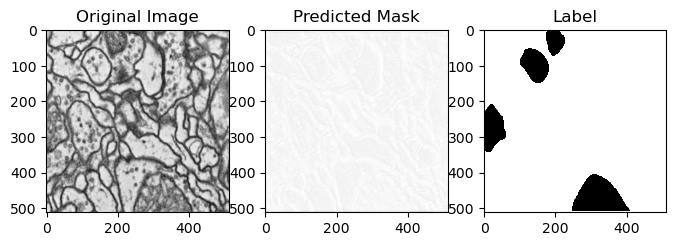

512
1/1 [==============================] - 0s 117ms/step
[[125.63809  127.68401  127.68401  ... 125.86916  125.26512  127.240074]
 [121.737946 125.641685 127.48856  ... 125.966934 127.38464  127.42593 ]
 [121.412186 126.54711  126.22888  ... 120.97664  127.68401  127.68401 ]
 ...
 [113.48128  120.66861  127.23346  ... 126.75058  127.68401  127.68026 ]
 [114.53387  122.82218  127.68401  ... 126.59052  127.68401  126.71074 ]
 [122.4181   124.27843  126.93741  ... 116.76592  127.68401  126.08323 ]]


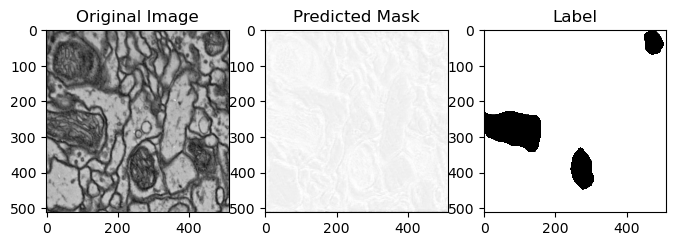

512
1/1 [==============================] - 0s 236ms/step
[[123.407364 127.68401  127.649605 ... 125.90931  125.12459  127.18342 ]
 [119.23895  126.54056  127.298645 ... 125.95063  127.68401  127.63061 ]
 [118.54364  126.31005  125.59652  ... 113.36974  127.68401  127.68401 ]
 ...
 [108.72167  118.9612   127.68401  ... 127.68401  127.68401  127.68401 ]
 [111.1478   118.52732  126.85587  ... 127.46562  127.68401  125.98634 ]
 [123.90481  125.78586  127.01112  ... 121.51159  127.23335  125.32677 ]]


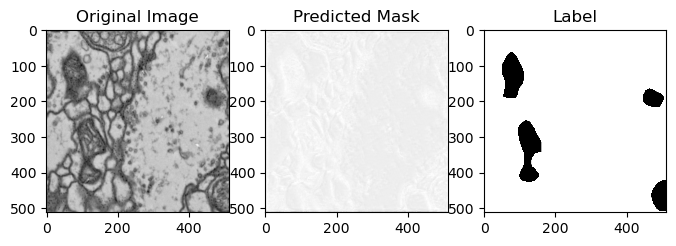

512
1/1 [==============================] - 0s 147ms/step
[[125.940315 127.68401  127.68401  ... 125.826866 124.68411  127.30606 ]
 [120.735405 127.35925  126.92419  ... 126.116905 127.68401  127.68401 ]
 [120.21327  126.738655 125.887825 ... 115.84075  127.68401  127.68401 ]
 ...
 [104.542984 116.53737  127.488106 ... 127.479385 127.68401  127.681694]
 [104.8966   116.8397   127.68401  ... 127.68401  127.68401  125.42581 ]
 [121.451    122.937096 126.949745 ... 118.72366  127.68401  125.787315]]


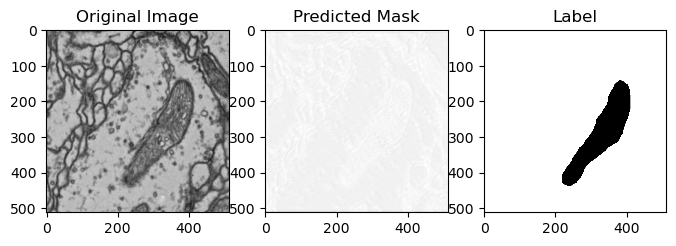

512
1/1 [==============================] - 0s 126ms/step
[[127.613914 127.68401  127.68401  ... 126.14155  125.125916 127.338264]
 [127.11769  127.67669  127.68401  ... 126.35791  127.68401  127.68401 ]
 [127.19487  126.47704  126.61538  ... 115.89456  127.41481  127.68401 ]
 ...
 [117.95149  121.4477   127.68401  ... 122.35628  127.68401  127.52436 ]
 [118.8049   124.23839  127.1194   ... 123.52934  127.68401  127.46941 ]
 [125.75219  126.26205  126.88425  ... 120.94983  127.68401  127.554794]]


512
1/1 [==============================] - 0s 117ms/step
[[122.29459  127.393845 127.68401  ... 126.735634 125.54471  127.54101 ]
 [115.87276  122.89795  127.68401  ... 127.17977  127.68401  127.57782 ]
 [115.23559  124.82672  125.18919  ... 118.78083  127.00535  127.68401 ]
 ...
 [100.69245  114.29945  127.59971  ... 125.36701  127.68401  127.58811 ]
 [101.259094 116.89636  127.29395  ... 125.32699  127.68401  127.68401 ]
 [120.84105  125.59245  126.58734  ... 118.99004  127.68401  126.94852 ]]


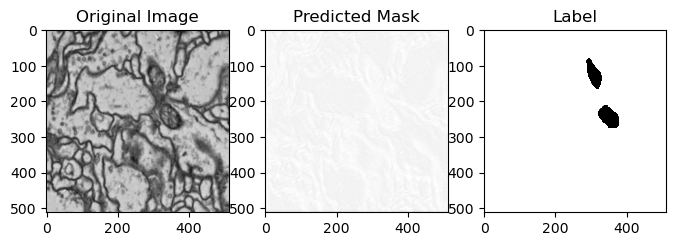

512
1/1 [==============================] - 0s 131ms/step
[[123.71799  127.5642   127.68401  ... 126.64138  126.120605 127.58879 ]
 [118.39583  124.800545 127.68401  ... 125.72439  127.68401  127.24561 ]
 [117.34501  125.14142  125.44689  ... 118.87793  127.68401  127.68401 ]
 ...
 [117.72725  121.57292  126.633064 ... 127.68401  127.68401  127.68401 ]
 [119.58624  124.0849   126.12352  ... 127.68401  127.68401  126.68764 ]
 [126.734474 126.67521  126.8366   ... 122.41545  127.68401  125.98456 ]]


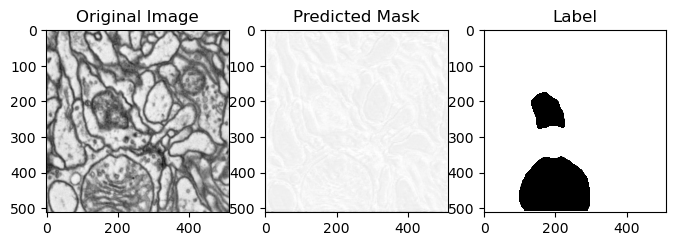

512
1/1 [==============================] - 0s 163ms/step
[[124.375046 127.07273  127.68401  ... 127.03099  125.8626   127.31839 ]
 [119.63515  123.03507  127.68401  ... 127.46038  127.68401  127.28465 ]
 [116.822075 123.72106  126.427086 ... 122.53671  127.68401  127.68401 ]
 ...
 [105.608116 115.91491  127.52385  ... 122.225204 127.68401  127.60504 ]
 [105.18661  117.29007  127.68401  ... 123.70809  127.68401  125.63577 ]
 [121.15383  123.899605 126.8166   ... 119.466385 127.68401  126.86581 ]]


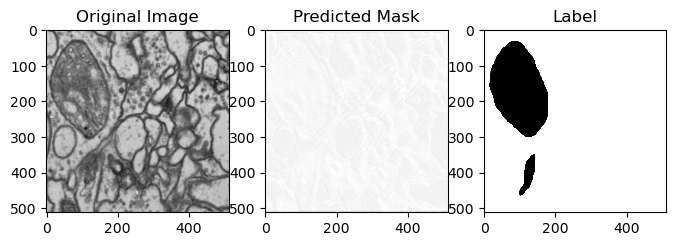

512
1/1 [==============================] - 0s 126ms/step
[[123.36056  127.68401  127.68401  ... 126.170555 125.87409  127.40461 ]
 [117.74741  125.6433   127.0494   ... 126.437256 127.68401  127.657265]
 [116.8573   125.73496  124.8166   ... 122.28989  127.68401  127.68401 ]
 ...
 [114.675575 118.86443  127.471    ... 125.70082  127.68401  127.3619  ]
 [115.010315 121.06111  126.90112  ... 124.00046  127.68401  125.92285 ]
 [125.10184  126.18852  127.07783  ... 121.88761  127.68401  126.92342 ]]


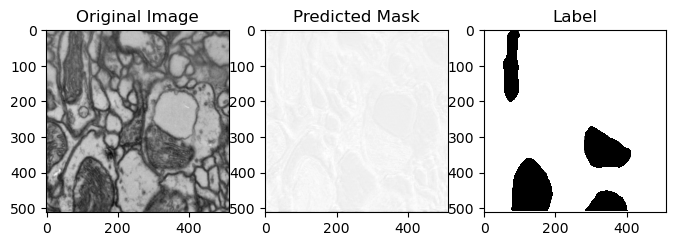

512
1/1 [==============================] - 0s 132ms/step
[[127.527405 127.68401  127.68401  ... 126.07186  124.690575 127.38658 ]
 [123.25081  127.18336  127.1383   ... 126.373375 127.68401  127.68401 ]
 [121.387856 127.03525  126.37981  ... 114.5105   127.68401  127.68401 ]
 ...
 [103.81151  116.38538  127.506386 ... 127.6055   127.68401  127.68401 ]
 [104.068306 118.55712  127.033104 ... 127.457756 127.68401  125.485344]
 [121.59213  125.9319   126.834015 ... 118.338234 127.68401  125.66585 ]]


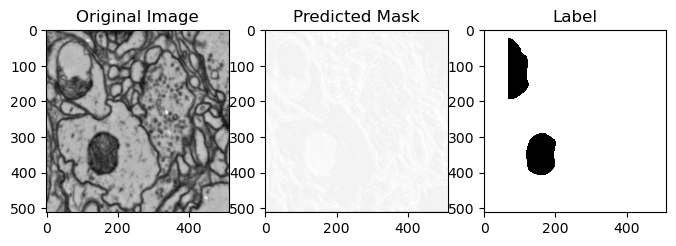

512
1/1 [==============================] - 0s 147ms/step
[[123.162865 127.487076 127.68401  ... 127.22309  125.96127  127.62945 ]
 [117.49929  123.26464  127.6555   ... 127.33008  127.68401  127.63661 ]
 [116.666534 125.28119  125.510704 ... 123.35482  127.68401  127.68401 ]
 ...
 [112.36155  122.31032  127.54861  ... 127.10028  127.68401  127.60144 ]
 [113.217865 120.35904  127.68401  ... 126.73644  127.68401  127.68401 ]
 [123.04545  124.49013  127.382286 ... 120.20142  127.68401  127.49697 ]]


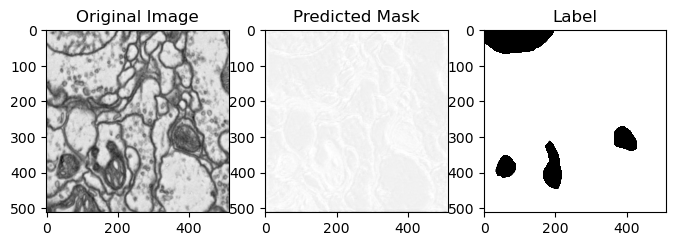

512
1/1 [==============================] - 0s 107ms/step
[[126.72618  127.68401  127.68401  ... 126.60116  126.35954  127.54968 ]
 [123.79041  126.70806  127.68401  ... 126.41311  127.68401  127.68401 ]
 [122.496086 126.222244 126.10954  ... 119.75685  127.68401  127.68401 ]
 ...
 [113.52373  119.917244 127.68401  ... 126.87366  127.68401  127.63963 ]
 [114.66589  121.966095 127.68401  ... 126.32602  127.68401  127.68401 ]
 [123.6143   124.94377  126.89316  ... 122.208374 127.68401  127.07245 ]]


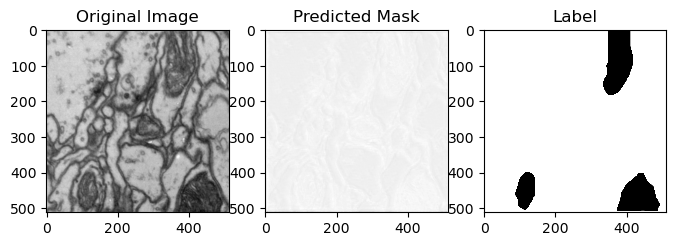

512
1/1 [==============================] - 0s 119ms/step
[[126.898094 127.68401  127.68401  ... 125.71876  124.80945  127.2899  ]
 [122.23687  127.24122  126.734886 ... 125.76053  127.68401  127.60253 ]
 [121.273026 126.67057  125.6236   ... 117.35203  127.68401  127.68401 ]
 ...
 [105.12066  119.61893  127.1853   ... 127.68401  127.68401  127.68401 ]
 [107.130066 118.563614 127.0487   ... 127.67623  127.68401  125.924   ]
 [120.44834  124.39994  127.095726 ... 117.6388   127.68401  125.32843 ]]


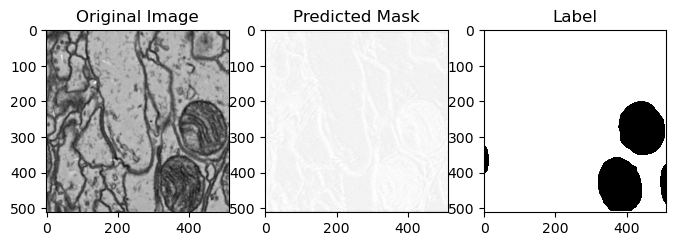

512
1/1 [==============================] - 0s 105ms/step
[[122.392105 127.63476  127.68401  ... 126.023125 124.9482   127.3347  ]
 [117.076706 123.13394  127.5856   ... 126.31316  127.68401  127.68401 ]
 [116.820984 125.586365 125.575676 ... 114.81801  127.68401  127.68401 ]
 ...
 [108.38067  117.86139  127.64694  ... 127.68401  127.68401  127.18969 ]
 [108.33666  120.3241   127.48309  ... 127.08558  127.68401  125.754   ]
 [122.7822   125.955574 126.90821  ... 121.79827  127.68401  126.144485]]


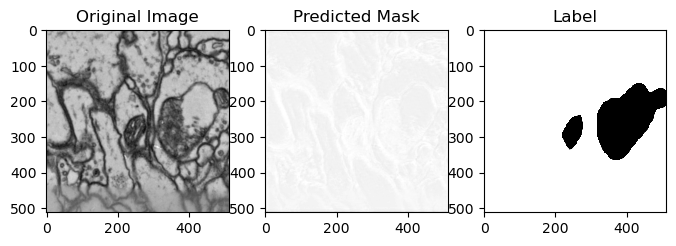

In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
# 設置圖像尺寸和路徑
img_size = (512, 512)  # 設定成模型訓練時使用的圖像尺寸
test_path = dataset + 'train_image'  # 測試圖像文件夾的路徑
test_l_path = dataset + 'train_label'  # 測試label圖像文件夾的路徑

# 獲取測試圖像文件列表
test_images = os.listdir(test_path)


# 預處理圖像並預測
for image_name in test_images:
    img_path = os.path.join(test_path, image_name)
    img = load_img(img_path, target_size=img_size, color_mode='grayscale')  # 確保讀取模式與訓練時相同
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # 正規化
    img_array = np.expand_dims(img_array, axis=0)  # 增加"批次"維度 : 原圖(512, 512, 1) 加入批次項 => (1, 512, 512, 1) 才能代入model.predict

    # 預測結果
    prediction = model.predict(img_array)
    predicted_image = prediction[0, :, :, 0]*255  # 獲取預測圖像
    # predicted_image = (prediction[0, :, :, 0] > 0.5)*255  # 獲取預測圖像(only remain image > 0.5 )

    print(predicted_image)

    # 視覺化原始圖像和預測結果
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    # plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Predicted Mask')
    plt.imshow(predicted_image, cmap='gray')
    # plt.axis('off')
              
    lbl_path = os.path.join(test_l_path, image_name)
    lbl = load_img(lbl_path, target_size=img_size, color_mode='grayscale')  # 確保讀取模式與訓練時相同
    lbl = img_to_array(lbl)

    plt.subplot(1, 3, 3);
    plt.title('Label')
    plt.imshow(lbl[:, :, 0], cmap='gray', vmin=0.0, vmax=1.0)
    # plt.axis('off')
    
    plt.show()


In [ ]:
# val_gen = ImageDataGenerator().flow_from_directory(
#     dataset,
#     classes=['train_image'],
#     class_mode=None,
#     color_mode="grayscale",
#     target_size=(512, 512),
#     batch_size=1,
#     seed=5)

# for img in val_gen:
#     img_processed = img / 255.0
#     pred = model.predict(img_processed)
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.title('Original Image')
#     plt.imshow(img[0])
#     plt.subplot(1, 2, 2)
#     plt.title('Predicted Mask')
#     plt.imshow(pred[0, :, :, 0], cmap='gray')
#     plt.show()
#     # break  # Show one example


## Exercise : try to rebuild a deeper unet model 

## Result : Prediciton results from UNet with dataset_Mitochondrion

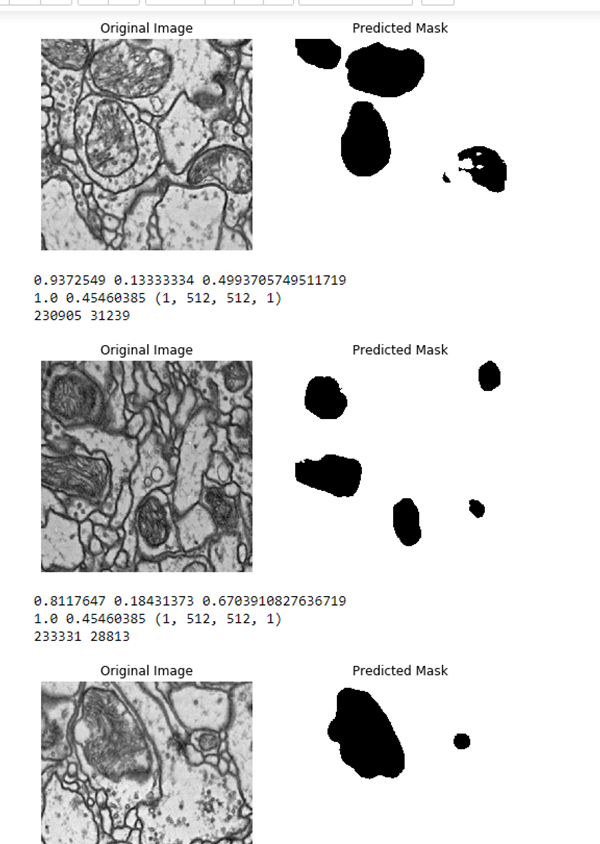